In [1]:
## import stuff
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt

# This is ass. 3 - Exploratory data analysis and hypotheses testing

focus is on cleaning data, visualisation, some statistics 
There are 3 steps to do:
1. Data Preperation
2. Data Visualization
3. Hypothesis Testing


General principle: 

Im Jupiter-Notebook sollen die einzelnen Analyseschritte detailliert beschrieben werden. - Gehen Sie insbesondere auf auch die Art und Weise ein, wie - die Daten aufbereiten wurden, - welche Methoden verwendet wurden und - wie die einzelnen Erkenntnisse bzw. Ergebnisse zustande kommen.

Für die Bewertung der Aufgaben ist nicht nur das Ergebnis relevant, sondern auch die Beschreibung des von Ihnen verwendeten Wegs, sowie Präsentation der Ergebnisse (Lesbarkeit, Angabe der Aufgabenummer).

# 1. Data preparation

## 1.1 Import the data and perform data cleaning if needed. Describe what you are doing
## 1.2 Determine the measurement scale of each attribute in the data set. Briefly explain your decision.

### 1.1 import and clean data

In [2]:
## get data
#path = "https://raw.githubusercontent.com/Ph1lippK/DAPy/master/"
#retail = pd.read_csv(path + "/03_Assignment Data.csv")
data = pd.read_csv("03_Assignment Data.csv")
data.head()
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Order Date        9994 non-null   object 
 1   Shipment Date     9994 non-null   object 
 2   Segment           9994 non-null   object 
 3   City              9994 non-null   object 
 4   State             9795 non-null   object 
 5   Region            9994 non-null   object 
 6   Product ID        9601 non-null   object 
 7   Product Category  9994 non-null   object 
 8   Profit            9799 non-null   float64
dtypes: float64(1), object(8)
memory usage: 702.8+ KB


In [3]:
print(data.isnull().sum())

Order Date            0
Shipment Date         0
Segment               0
City                  0
State               199
Region                0
Product ID          393
Product Category      0
Profit              195
dtype: int64


So while checking for missing values I figured that I have to look into the profit, product ID and State columns a little deeper.
State and profit will be important in the later tasks, thus I will look deeper into that. 
Firstly Im replacing values from product ID with a placeholder, since that column wont be essential for my later analysis. 
State might be replaceable, since we have city and region.

In [4]:
data['Product ID'] = data['Product ID'].fillna('Unknown')
#print(data.isnull().sum())

In [5]:
## Missing values in the "State" column I will replace with the most frequent state for each combination of "City" and "Region"
## To do that I will create a mapping of the mode (most frequent value) of the "State" for each group
## and then use that to fill the missing values.

# Create a mapping of the mode of 'State' for each group of 'City' and 'Region'
state_mapping = data.groupby(['City', 'Region'])['State'].agg(pd.Series.mode).to_dict()

# Define a function to apply to the missing values in 'State'
def fill_state(row):
    if pd.isnull(row['State']):
        return state_mapping.get((row['City'], row['Region']))
    else:
        return row['State']

# Apply the function to the 'State' column
data['State'] = data.apply(fill_state, axis=1)
##print(data.isnull().sum())

Regarding the profit column with null values I will just drop the values, since I have 195 entries and that is 1.96 %, so a non essential amount of missing data. There is another issue bugging me though, I have 461 entries with a profit of 0.0. In a real life example I would check with my business partner, in order to get more business knowledge if that is a thing that they will sell stuff for zero profit. It might be a reasonable sales approach for big customers to sell the first stuff cheaper or with 0 profit, but I just do not know that. Hence I will drop the values, in real life I would talk to my business partner to get more business understanding

In [7]:
zero_profit_data = data[data['Profit'] == 0.0]
zero_profit_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 461 entries, 33 to 9993
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Order Date        461 non-null    object 
 1   Shipment Date     461 non-null    object 
 2   Segment           461 non-null    object 
 3   City              461 non-null    object 
 4   State             461 non-null    object 
 5   Region            461 non-null    object 
 6   Product ID        461 non-null    object 
 7   Product Category  461 non-null    object 
 8   Profit            461 non-null    float64
dtypes: float64(1), object(8)
memory usage: 36.0+ KB


In [8]:
# Remove rows with 'Profit' as NaN
data = data[data['Profit'].notna()]
# Remove rows with 'Profit' as 0.0
data = data[data['Profit'] != 0.0]
## testing my code to make sure I have no missing values or profit =0.0 anymore
##print(data.isnull().sum())
##zero_profit_data = data[data['Profit'] == 0.0]
##zero_profit_data.info()


In [9]:
data.head()

,Order Date,Shipment Date,Segment,City,State,Region,Product ID,Product Category,Profit
0,2020-11-08,2020-11-11,Consumer,Henderson,Kentucky,South,FUR-BO-10001798,Furniture,41.9136
1,2020-11-08,2020-11-11,Consumer,Henderson,Kentucky,South,FUR-CH-10000454,Furniture,219.5820
2,2020-06-12,2020-06-16,Others,Los Angeles,California,West,OFF-LA-10000240,Office Supplies,6.8714
3,2019-10-11,2019-10-18,Consumer,Fort Lauderdale,Florida,South,FUR-TA-10000577,Furniture,-383.0310
4,2019-10-11,2019-10-18,Consumer,Fort Lauderdale,Florida,South,OFF-ST-10000760,Office Supplies,2.5164


Regarding later task I will have to visualize by month, by state each looking at the profit. Thus I will check my profit column for a distribution and outliners. 
Furthermore, since I have to visualize how the profit has changed on a monthly basis I will check if 'Order Date' is not in datetime format and convert if necessary. 
After that I have to create a column "Month" as preliminary work to visualize by month. 

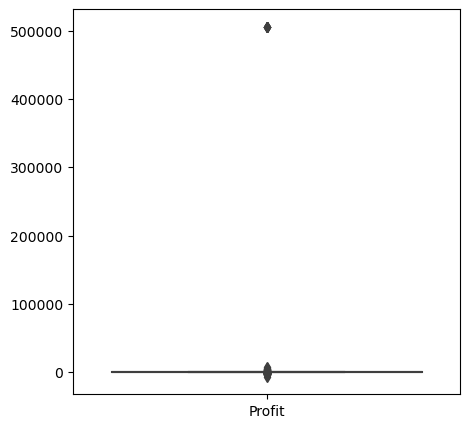

In [13]:
data_profit = data[['Profit']]
# Plot Boxplot
fig, ax = plt.subplots(figsize=(5, 5))
sns.boxplot(data=data_profit) # Use a boxplot to visualize any outliers
plt.show()

In [17]:
Q1 = data['Profit'].quantile(0.25)
Q3 = data['Profit'].quantile(0.75)
IQR = Q3 - Q1

# Define bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
#outliers = data[(data['Profit'] < lower_bound) | (data['Profit'] > upper_bound)]
#print(outliers)
# Remove outliers
data = data[(data['Profit'] >= lower_bound) & (data['Profit'] <= upper_bound)]

In [21]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7584 entries, 0 to 9992
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Order Date        7584 non-null   object 
 1   Shipment Date     7584 non-null   object 
 2   Segment           7584 non-null   object 
 3   City              7584 non-null   object 
 4   State             7584 non-null   object 
 5   Region            7584 non-null   object 
 6   Product ID        7584 non-null   object 
 7   Product Category  7584 non-null   object 
 8   Profit            7584 non-null   float64
dtypes: float64(1), object(8)
memory usage: 592.5+ KB


In [22]:
## now checking for column order date in datetime format and converting
print(data['Order Date'].dtypes)
##unfortunately if is type object (,,>﹏<,,)

object


In [28]:
data['Order Date'] = pd.to_datetime(data['Order Date'])
print(data['Order Date'].dtypes)

datetime64[ns]


In [29]:
## extracting month and creating new column
data['Order Month'] = data['Order Date'].dt.month
data.head()

,Order Date,Shipment Date,Segment,City,State,Region,Product ID,Product Category,Profit,Order Month
0,2020-11-08,2020-11-11,Consumer,Henderson,Kentucky,South,FUR-BO-10001798,Furniture,41.9136,11
2,2020-06-12,2020-06-16,Others,Los Angeles,California,West,OFF-LA-10000240,Office Supplies,6.8714,6
4,2019-10-11,2019-10-18,Consumer,Fort Lauderdale,Florida,South,OFF-ST-10000760,Office Supplies,2.5164,10
5,2018-06-09,2018-06-14,Consumer,Los Angeles,California,West,FUR-FU-10001487,Furniture,14.1694,6
6,2018-06-09,2018-06-14,Consumer,Los Angeles,California,West,OFF-AR-10002833,Office Supplies,1.9656,6


### 1.2 Determine the measurement scale of each attribute in the data set. Briefly explain your decision.

In [30]:
print(data.dtypes)

Order Date          datetime64[ns]
Shipment Date               object
Segment                     object
City                        object
State                       object
Region                      object
Product ID                  object
Product Category            object
Profit                     float64
Order Month                  int64
dtype: object


### General principle

1. datetime64[ns]: This represents date and/or time values. These are usually interval scale data.
2. object: This is usually a string or a mix of other data types. In many cases, these columns may hold nominal scale data (like names, ids), but they can also hold ordinal data if the data are coded as text (like 'low', 'medium', 'high').
3. int64 or float64: These are numeric types. They can hold ordinal data (like rankings), interval data (like temperatures in Celsius or Fahrenheit, dates), or ratio data (like height, weight, age). The actual scale will depend on the nature of the data.

### for my dataset

1. Order Date: Interval scale - Dates are measured on an interval scale, as there are equal intervals between consecutive dates and you can perform arithmetic operations on them.
1. Shipment Date: Interval scale - The same reasoning as "Order Date" applies here.
1. Segment: Nominal scale - The "Segment" attribute is a categorical variable. The values like "Consumer" or "Others" are categories that have no inherent order, so this is a nominal scale.
1. City: Nominal scale - City names are categorical and can't be ordered in a meaningful way, so this is a nominal scale.
1. State: Nominal scale - State names are categorical and don't have a meaningful order, so this is a nominal scale.
1. Region: Nominal scale - Regions, similar to states and cities, fall into the category of nominal data, as there's no inherent order or ranking in the name of regions.
1. Product ID: Nominal scale - Though "Product ID" looks numeric, it's really a categorical variable used to uniquely identify products. There's no meaningful order or difference, so this is a nominal scale.
1. Product Category: Nominal scale - The categories like "Furniture", "Office Supplies" or "Technology" are categorical and have no inherent order, so this is a nominal scale.
1. Profit: Ratio scale - Profit can be measured on a ratio scale. It has a true zero point (no profit) and you can make relative comparisons (e.g., "Profit A is twice as large as Profit B").
1. Order Month: Interval scale - The months of the year, from 1 (January) to 12 (December), have a specific order and equal intervals between them.


# 2. Data Visualization
1. Visualize how the profit has changed on a monthly basis using one appropriate chart. Describe and interpret the results.
2. The company wants to know, which states have been profitable and in which states occurred a loss. Visualize the profit or loss amongst different states using one appropriate chart. Describe and interpret the results.
3. Visualize the state-wise profit or loss according to the product categories using one appropriate chart. Describe and interpret the results.
4. Visualize the distribution of the profit according to the product categories using one appropriate chart. Describe and interpret the result

### 2.1 Visualize how the profit has changed on a monthly basis using one appropriate chart. Describe and interpret the results.

In [31]:
data.head()

,Order Date,Shipment Date,Segment,City,State,Region,Product ID,Product Category,Profit,Order Month
0,2020-11-08,2020-11-11,Consumer,Henderson,Kentucky,South,FUR-BO-10001798,Furniture,41.9136,11
2,2020-06-12,2020-06-16,Others,Los Angeles,California,West,OFF-LA-10000240,Office Supplies,6.8714,6
4,2019-10-11,2019-10-18,Consumer,Fort Lauderdale,Florida,South,OFF-ST-10000760,Office Supplies,2.5164,10
5,2018-06-09,2018-06-14,Consumer,Los Angeles,California,West,FUR-FU-10001487,Furniture,14.1694,6
6,2018-06-09,2018-06-14,Consumer,Los Angeles,California,West,OFF-AR-10002833,Office Supplies,1.9656,6


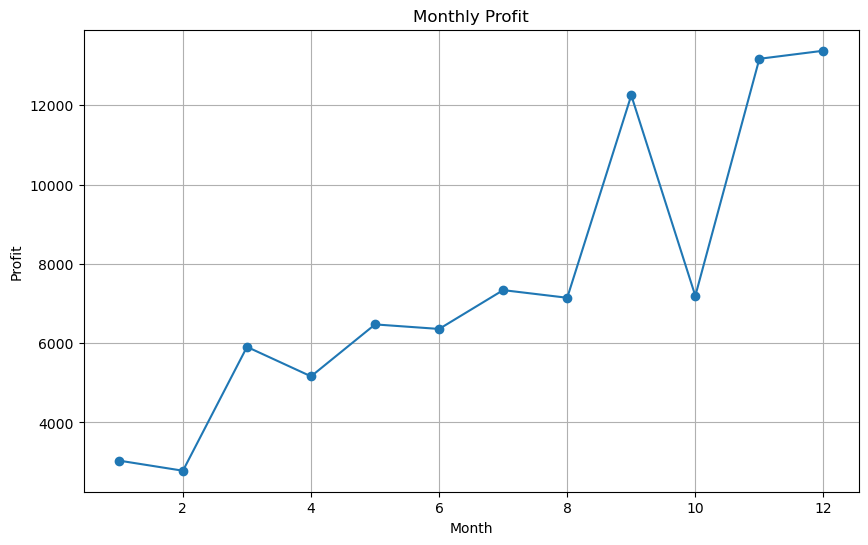

In [32]:
## in order to visualize how the profit has changed on a monthly basis
## we  need to aggregate the data by the month and then sum up the profits for each month.

# Ensure the data is sorted by 'Order Date' before groupby operation
data.sort_values('Order Date', inplace=True)

# Group data by 'Order Month' and calculate sum of 'Profit' for each month
monthly_profit = data.groupby('Order Month')['Profit'].sum()

# Plotting
plt.figure(figsize=(10,6))
plt.plot(monthly_profit.index, monthly_profit.values, marker='o')
plt.xlabel('Month')
plt.ylabel('Profit')
plt.title('Monthly Profit')
plt.grid(True)
plt.show()



### 2.2 The company wants to know, which states have been profitable and in which states occurred a loss. Visualize the profit or loss amongst different states using one appropriate chart. Describe and interpret the results. 

### 2.3 Visualize the state-wise profit or loss according to the product categories using one appropriate chart. Describe and interpret the results. 

### 2.4 Visualize the distribution of the profit according to the product categories using one appropriate chart. Describe and interpret the result